## Mid sem presentation (Normal Approaches)

### Load Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

### Read Data

In [2]:
df = pd.read_csv("creditcard.csv")

### Glimse of data

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Credit card Fraud- data unbalance

/home/abhigyan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')]

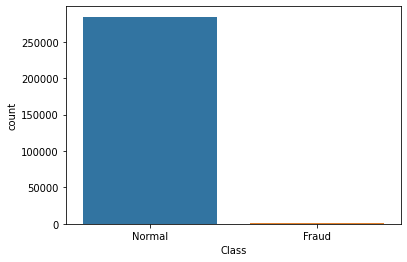

In [6]:
graph = sns.countplot(df["Class"],data=df)
graph.set_xticklabels(["Normal","Fraud"])

### check for missing values

<AxesSubplot:>

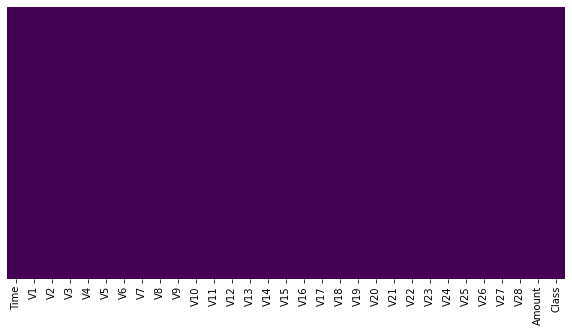

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [8]:
target = df["Class"]

In [9]:
target

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [10]:
df= df.drop(["Class"],axis=1)

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


## splitting data in train and test sets

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.3,random_state=42)

In [13]:
x_test.shape

(85443, 30)

In [14]:
x_train.shape

(199364, 30)

In [15]:
y_test.value_counts()

0    85307
1      136
Name: Class, dtype: int64

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score

In [17]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = KFold(n_splits=10, random_state=42, shuffle=True) 

results = cross_validate(estimator=rf,
                                          X=df,
                                          y=target,
                                          cv=kfold,
                                          scoring=scoring)

In [18]:
results

{'fit_time': array([206.50860167, 217.03749084, 225.67588663, 231.59766674,
        218.80506516, 222.93177891, 225.5365696 , 225.49507165,
        224.47780919, 221.17659235]),
 'score_time': array([0.27703834, 0.28824186, 0.28799248, 0.3579731 , 0.28504872,
        0.36108303, 0.29108453, 0.28813171, 0.29147482, 0.2842145 ]),
 'test_accuracy': array([0.99957867, 0.99954356, 0.99971911, 0.99943822, 0.99950844,
        0.99947333, 0.99964889, 0.99950843, 0.99950843, 0.99968399]),
 'test_precision': array([0.97222222, 0.97560976, 0.89473684, 0.93333333, 1.        ,
        0.93103448, 0.975     , 0.95348837, 0.89583333, 1.        ]),
 'test_recall': array([0.76086957, 0.76923077, 0.89473684, 0.76363636, 0.74545455,
        0.675     , 0.8125    , 0.77358491, 0.82692308, 0.83018868]),
 'test_f1_score': array([0.85365854, 0.86021505, 0.89473684, 0.84      , 0.85416667,
        0.7826087 , 0.88636364, 0.85416667, 0.86      , 0.90721649])}

In [19]:
precision = np.mean(results['test_precision'])
precision
np.mean(results['test_recall'])

0.785212474747307

In [20]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9996137776061234
[[85299     8]
 [   25   111]]
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     85307
           1     0.9328    0.8162    0.8706       136

    accuracy                         0.9996     85443
   macro avg     0.9662    0.9080    0.9352     85443
weighted avg     0.9996    0.9996    0.9996     85443



## AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 100, random_state = 42,algorithm='SAMME.R',
                         learning_rate=0.8,)
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [23]:
y_pred = ada.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.999403110845827
[[85290    17]
 [   34   102]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85307
           1     0.8571    0.7500    0.8000       136

    accuracy                         0.9994     85443
   macro avg     0.9284    0.8749    0.8999     85443
weighted avg     0.9994    0.9994    0.9994     85443



## Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9985838512224524
[[85305     2]
 [  119    17]]
              precision    recall  f1-score   support

           0     0.9986    1.0000    0.9993     85307
           1     0.8947    0.1250    0.2194       136

    accuracy                         0.9986     85443
   macro avg     0.9467    0.5625    0.6093     85443
weighted avg     0.9984    0.9986    0.9980     85443



## XG Boost

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:33:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9996722961506501
[[85301     6]
 [   22   114]]
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     85307
           1     0.9500    0.8382    0.8906       136

    accuracy                         0.9997     85443
   macro avg     0.9749    0.9191    0.9452     85443
weighted avg     0.9997    0.9997    0.9997     85443



## Under Sampling

In [28]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [29]:
us = NearMiss(0.8)
x_train_us,y_train_us = us.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_us)))

/home/abhigyan/.local/lib/python3.8/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The samples before fit Counter({0: 199008, 1: 356})
The samples before fit Counter({0: 445, 1: 356})


## Rf with US

In [30]:
rf.fit(x_train_us,y_train_us)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.7099352784897534
[[60531 24776]
 [    8   128]]
              precision    recall  f1-score   support

           0     0.9999    0.7096    0.8301     85307
           1     0.0051    0.9412    0.0102       136

    accuracy                         0.7099     85443
   macro avg     0.5025    0.8254    0.4201     85443
weighted avg     0.9983    0.7099    0.8288     85443



## Ada with US

In [31]:
ada.fit(x_train_us,y_train_us)
y_pred = ada.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.5133363762976487
[[43730 41577]
 [    5   131]]
              precision    recall  f1-score   support

           0     0.9999    0.5126    0.6778     85307
           1     0.0031    0.9632    0.0063       136

    accuracy                         0.5133     85443
   macro avg     0.5015    0.7379    0.3420     85443
weighted avg     0.9983    0.5133    0.6767     85443



## GB with US

In [32]:
gb.fit(x_train_us,y_train_us)
y_pred = gb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.5573891366173941
[[47493 37814]
 [    4   132]]
              precision    recall  f1-score   support

           0     0.9999    0.5567    0.7152     85307
           1     0.0035    0.9706    0.0069       136

    accuracy                         0.5574     85443
   macro avg     0.5017    0.7637    0.3611     85443
weighted avg     0.9983    0.5574    0.7141     85443



## XGB with US

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_us,y_train_us)
y_pred = xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

[21:34:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.6010673782521682
[[51226 34081]
 [    5   131]]
              precision    recall  f1-score   support

           0     0.9999    0.6005    0.7504     85307
           1     0.0038    0.9632    0.0076       136

    accuracy                         0.6011     85443
   macro avg     0.5019    0.7819    0.3790     85443
weighted avg     0.9983    0.6011    0.7492     85443



## Over Sampling

In [34]:
from imblearn.over_sampling import RandomOverSampler

In [35]:
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_os)))

/home/abhigyan/.local/lib/python3.8/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The samples before fit Counter({0: 199008, 1: 356})
The samples before fit Counter({0: 199008, 1: 149256})


## Rf with OS

In [36]:
rf.fit(x_train_os,y_train_os)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9996371850239341
[[85302     5]
 [   26   110]]
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     85307
           1     0.9565    0.8088    0.8765       136

    accuracy                         0.9996     85443
   macro avg     0.9781    0.9044    0.9382     85443
weighted avg     0.9996    0.9996    0.9996     85443



## Ada with OS

In [37]:
ada.fit(x_train_os,y_train_os)
y_pred = ada.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9909998478517842
[[84548   759]
 [   10   126]]
              precision    recall  f1-score   support

           0     0.9999    0.9911    0.9955     85307
           1     0.1424    0.9265    0.2468       136

    accuracy                         0.9910     85443
   macro avg     0.5711    0.9588    0.6211     85443
weighted avg     0.9985    0.9910    0.9943     85443



## Gb with OS

In [38]:
gb.fit(x_train_os,y_train_os)
y_pred = gb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9938789602425009
[[84796   511]
 [   12   124]]
              precision    recall  f1-score   support

           0     0.9999    0.9940    0.9969     85307
           1     0.1953    0.9118    0.3217       136

    accuracy                         0.9939     85443
   macro avg     0.5976    0.9529    0.6593     85443
weighted avg     0.9986    0.9939    0.9959     85443



## XG boost with OS

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_os,y_train_os)
y_pred = xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:43:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9996371850239341
[[85296    11]
 [   20   116]]
              precision    recall  f1-score   support

           0     0.9998    0.9999    0.9998     85307
           1     0.9134    0.8529    0.8821       136

    accuracy                         0.9996     85443
   macro avg     0.9566    0.9264    0.9410     85443
weighted avg     0.9996    0.9996    0.9996     85443



## SMOTETomek

In [40]:
from imblearn.combine import SMOTETomek

In [41]:
sm = SMOTETomek()
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_sm)))

The samples before fit Counter({0: 199008, 1: 356})
The samples before fit Counter({0: 198357, 1: 198357})


In [42]:
Counter(y_test)

Counter({1: 136, 0: 85307})

## Rf with SMOTETomek

In [43]:
rf.fit(x_train_sm,y_train_sm)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9995435553526912
[[85286    21]
 [   18   118]]
              precision    recall  f1-score   support

           0     0.9998    0.9998    0.9998     85307
           1     0.8489    0.8676    0.8582       136

    accuracy                         0.9995     85443
   macro avg     0.9244    0.9337    0.9290     85443
weighted avg     0.9995    0.9995    0.9995     85443



## Ada with SMOTETomek

In [44]:
ada.fit(x_train_sm,y_train_sm)
y_pred = ada.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9903210327352738
[[84490   817]
 [   10   126]]
              precision    recall  f1-score   support

           0     0.9999    0.9904    0.9951     85307
           1     0.1336    0.9265    0.2335       136

    accuracy                         0.9903     85443
   macro avg     0.5667    0.9584    0.6143     85443
weighted avg     0.9985    0.9903    0.9939     85443



## Gb with SMOTETomek

In [45]:
gb.fit(x_train_sm,y_train_sm)
y_pred = gb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9936565897732992
[[84776   531]
 [   11   125]]
              precision    recall  f1-score   support

           0     0.9999    0.9938    0.9968     85307
           1     0.1905    0.9191    0.3157       136

    accuracy                         0.9937     85443
   macro avg     0.5952    0.9564    0.6562     85443
weighted avg     0.9986    0.9937    0.9957     85443



## XGB with SMOTETomek

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_sm,y_train_sm)
y_pred = xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:55:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9993211848834895
[[85266    41]
 [   17   119]]
              precision    recall  f1-score   support

           0     0.9998    0.9995    0.9997     85307
           1     0.7438    0.8750    0.8041       136

    accuracy                         0.9993     85443
   macro avg     0.8718    0.9373    0.9019     85443
weighted avg     0.9994    0.9993    0.9993     85443

